# Assignment

classify the Size_Categorie using SVM

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_regression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras import layers
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasRegressor,KerasClassifier
from tensorflow.keras.optimizers import Adam

In [ ]:
forest_df = pd.read_csv('forestfires.csv')
forest_df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
forest_df.shape

(517, 31)

In [ ]:
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
#removing month and day columns as they are already present in the table in encoder form 
forest_data = forest_df.drop(['month','day'],axis=1)
forest_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
forest_data.shape

(517, 29)

In [ ]:
forest_data.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [ ]:
forest_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
forest_data[forest_data.duplicated()]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
100,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
215,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,...,0,0,0,0,1,0,0,0,0,large
303,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,1,...,0,0,0,1,0,0,0,0,0,small
426,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
461,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
501,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,0,...,0,0,0,0,0,0,0,0,0,small
508,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
forest_data[forest_data.duplicated()].shape

(8, 29)

In [ ]:
forest_data.drop_duplicates(ignore_index=True,inplace=True)

In [ ]:
forest_data[forest_data.duplicated()].shape

(0, 29)

In [ ]:
#lets see how many categories are there in size_type
print("no of Types :",len(forest_data['size_category'].value_counts()))
print("Frequency of Types")
forest_data['size_category'].value_counts()

no of Types : 2
Frequency of Types


small    371
large    138
Name: size_category, dtype: int64

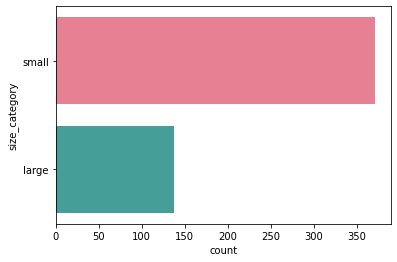

In [ ]:
sns.countplot(y='size_category',data=forest_data,palette="husl")

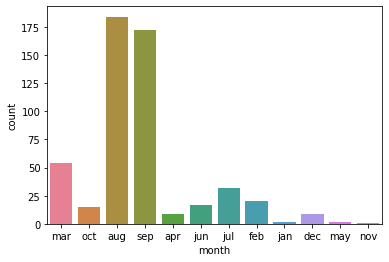

In [ ]:
sns.countplot(x='month',data=forest_df,palette="husl")

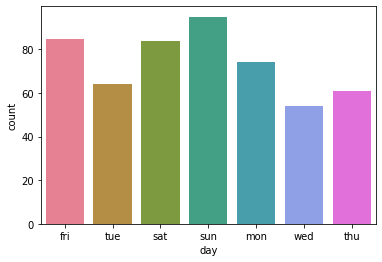

In [ ]:
sns.countplot(x='day',data=forest_df,palette="husl")

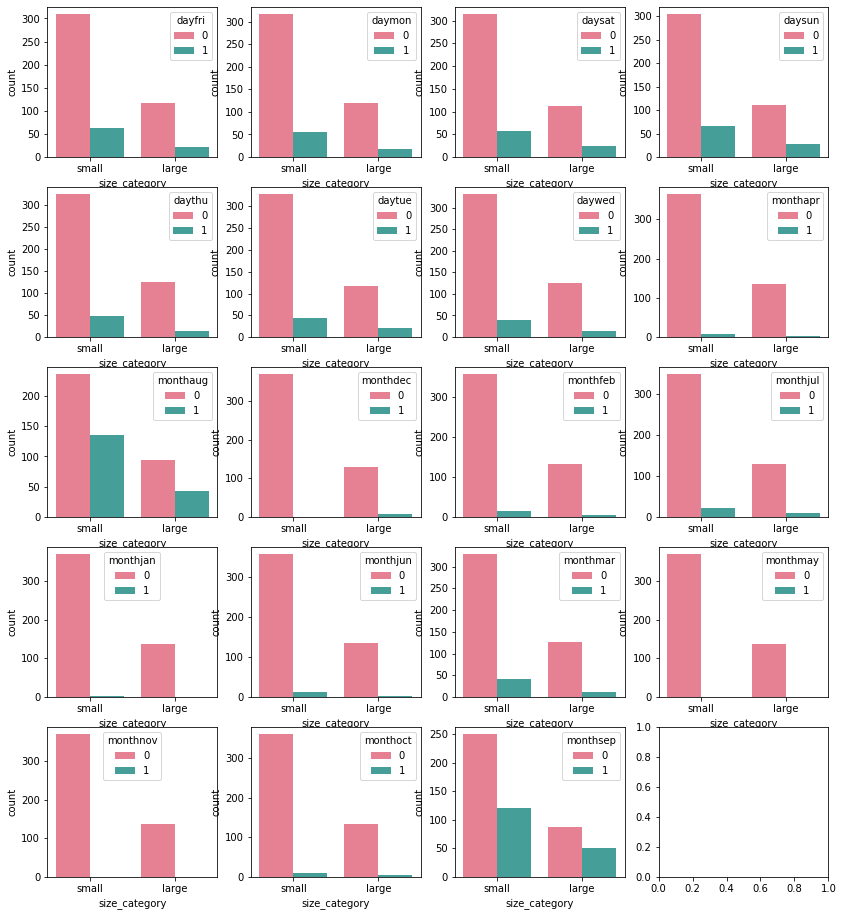

In [ ]:
fig, ax =plt.subplots(5,4, figsize=(14,16)) 

sns.countplot(x='size_category', hue='dayfri',data=forest_data,palette="husl" ,ax=ax[0,0])
sns.countplot(x='size_category',hue='daymon',data=forest_data,palette="husl" ,ax=ax[0,1])
sns.countplot(x='size_category',hue='daysat',data=forest_data,palette="husl" ,ax=ax[0,2])
sns.countplot(x='size_category',hue='daysun',data=forest_data,palette="husl" ,ax=ax[0,3])

sns.countplot(x='size_category',hue='daythu',data=forest_data,palette="husl" ,ax=ax[1,0])
sns.countplot(x='size_category',hue='daytue',data=forest_data,palette="husl" ,ax=ax[1,1])
sns.countplot(x='size_category',hue='daywed',data=forest_data,palette="husl" ,ax=ax[1,2])
sns.countplot(x='size_category',hue='monthapr',data=forest_data,palette="husl" ,ax=ax[1,3])

sns.countplot(x='size_category',hue='monthaug',data=forest_data,palette="husl" ,ax=ax[2,0])
sns.countplot(x='size_category',hue='monthdec',data=forest_data,palette="husl" ,ax=ax[2,1])
sns.countplot(x='size_category',hue='monthfeb',data=forest_data,palette="husl" ,ax=ax[2,2])
sns.countplot(x='size_category',hue='monthjul',data=forest_data,palette="husl" ,ax=ax[2,3])

sns.countplot(x='size_category',hue='monthjan',data=forest_data,palette="husl" ,ax=ax[3,0])
sns.countplot(x='size_category',hue='monthjun',data=forest_data,palette="husl" ,ax=ax[3,1])
sns.countplot(x='size_category',hue='monthmar',data=forest_data,palette="husl" ,ax=ax[3,2])
sns.countplot(x='size_category',hue='monthmay',data=forest_data,palette="husl" ,ax=ax[3,3])

sns.countplot(x='size_category',hue='monthnov',data=forest_data,palette="husl" ,ax=ax[4,0])
sns.countplot(x='size_category',hue='monthoct',data=forest_data,palette="husl" ,ax=ax[4,1])
sns.countplot(x='size_category',hue='monthsep',data=forest_data,palette="husl" ,ax=ax[4,2])


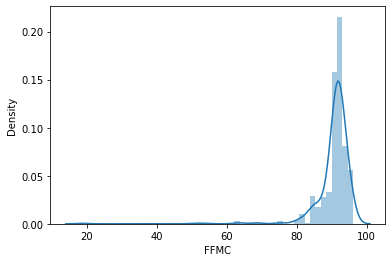

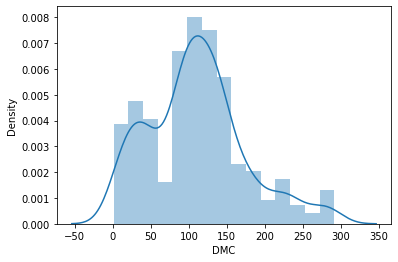

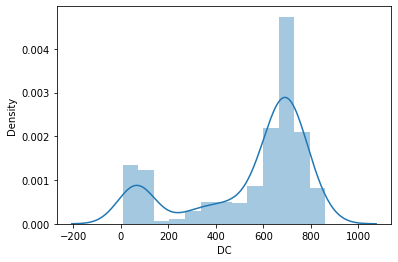

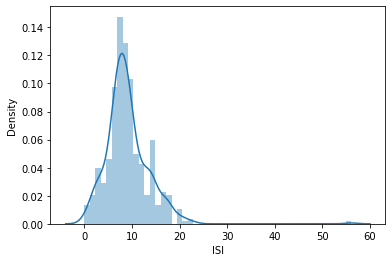

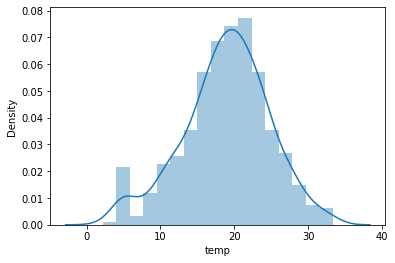

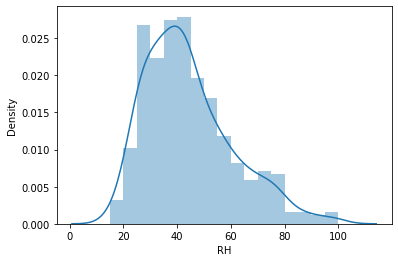

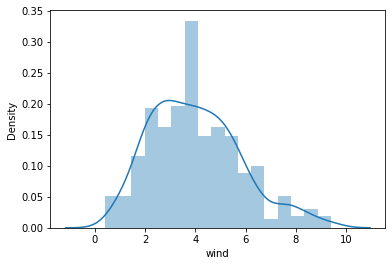

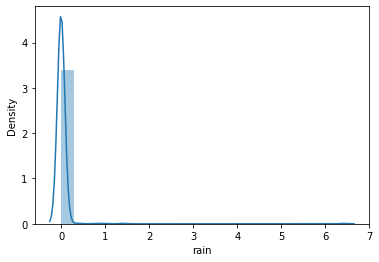

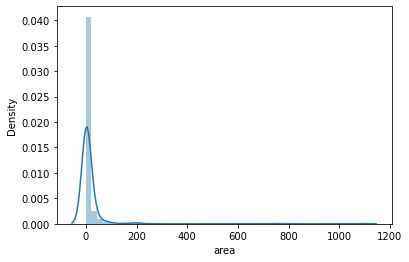

In [ ]:
cols = (['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area'])
for col in cols:
    sns.distplot(forest_data[col])
    plt.show()

In [ ]:
forest_data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998,0.020889,...,-0.136614,-0.281054,-0.455128,0.033137,-0.041972,-0.074706,-0.036983,-0.088879,-0.005172,0.080444
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932,-0.011152,...,-0.177044,-0.319691,-0.106256,0.000617,-0.047759,-0.404974,-0.082312,-0.074642,-0.188126,0.119779
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542,-0.001642,...,-0.106347,-0.402201,-0.115871,-0.101518,-0.178719,-0.648890,-0.115010,-0.078927,0.094091,0.538299
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429,0.051599,...,-0.162761,-0.250494,-0.103846,0.020932,0.119765,-0.143589,-0.060655,-0.076748,-0.071401,-0.069600
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173,-0.077766,...,-0.329774,-0.319901,-0.146547,0.143987,0.052779,-0.342129,-0.045372,-0.053720,-0.052918,0.091428
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554,0.069599,...,-0.047670,0.141593,0.171900,0.013808,0.014425,-0.083581,0.087384,-0.035967,-0.072335,-0.061631
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623,0.121056,...,0.270919,-0.028820,-0.070217,-0.039880,0.010124,0.181610,0.015311,0.012049,-0.053404,-0.180211
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511,-0.001723,...,-0.009262,-0.013961,-0.004336,-0.012411,-0.012437,-0.019189,-0.004336,-0.003063,-0.012030,-0.049319
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000,-0.052390,...,0.000706,-0.021205,-0.012737,0.005566,-0.019083,-0.048394,0.006124,-0.008997,-0.017284,0.055191
dayfri,0.020889,-0.011152,-0.001642,0.051599,-0.077766,0.069599,0.121056,-0.001723,-0.052390,1.000000,...,-0.018868,0.047592,-0.027723,-0.048598,-0.018562,0.041050,0.057284,-0.019584,-0.045470,0.111903


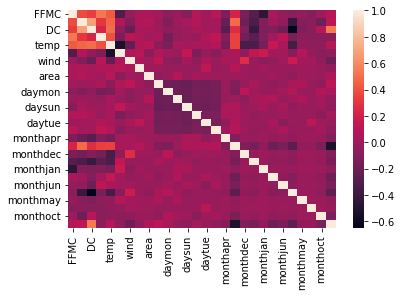

In [ ]:
sns.heatmap(forest_data.corr())

In [ ]:
forest_df_1 = forest_df.drop(['dayfri','daymon','daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep'],axis=1)
forest_df_1.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

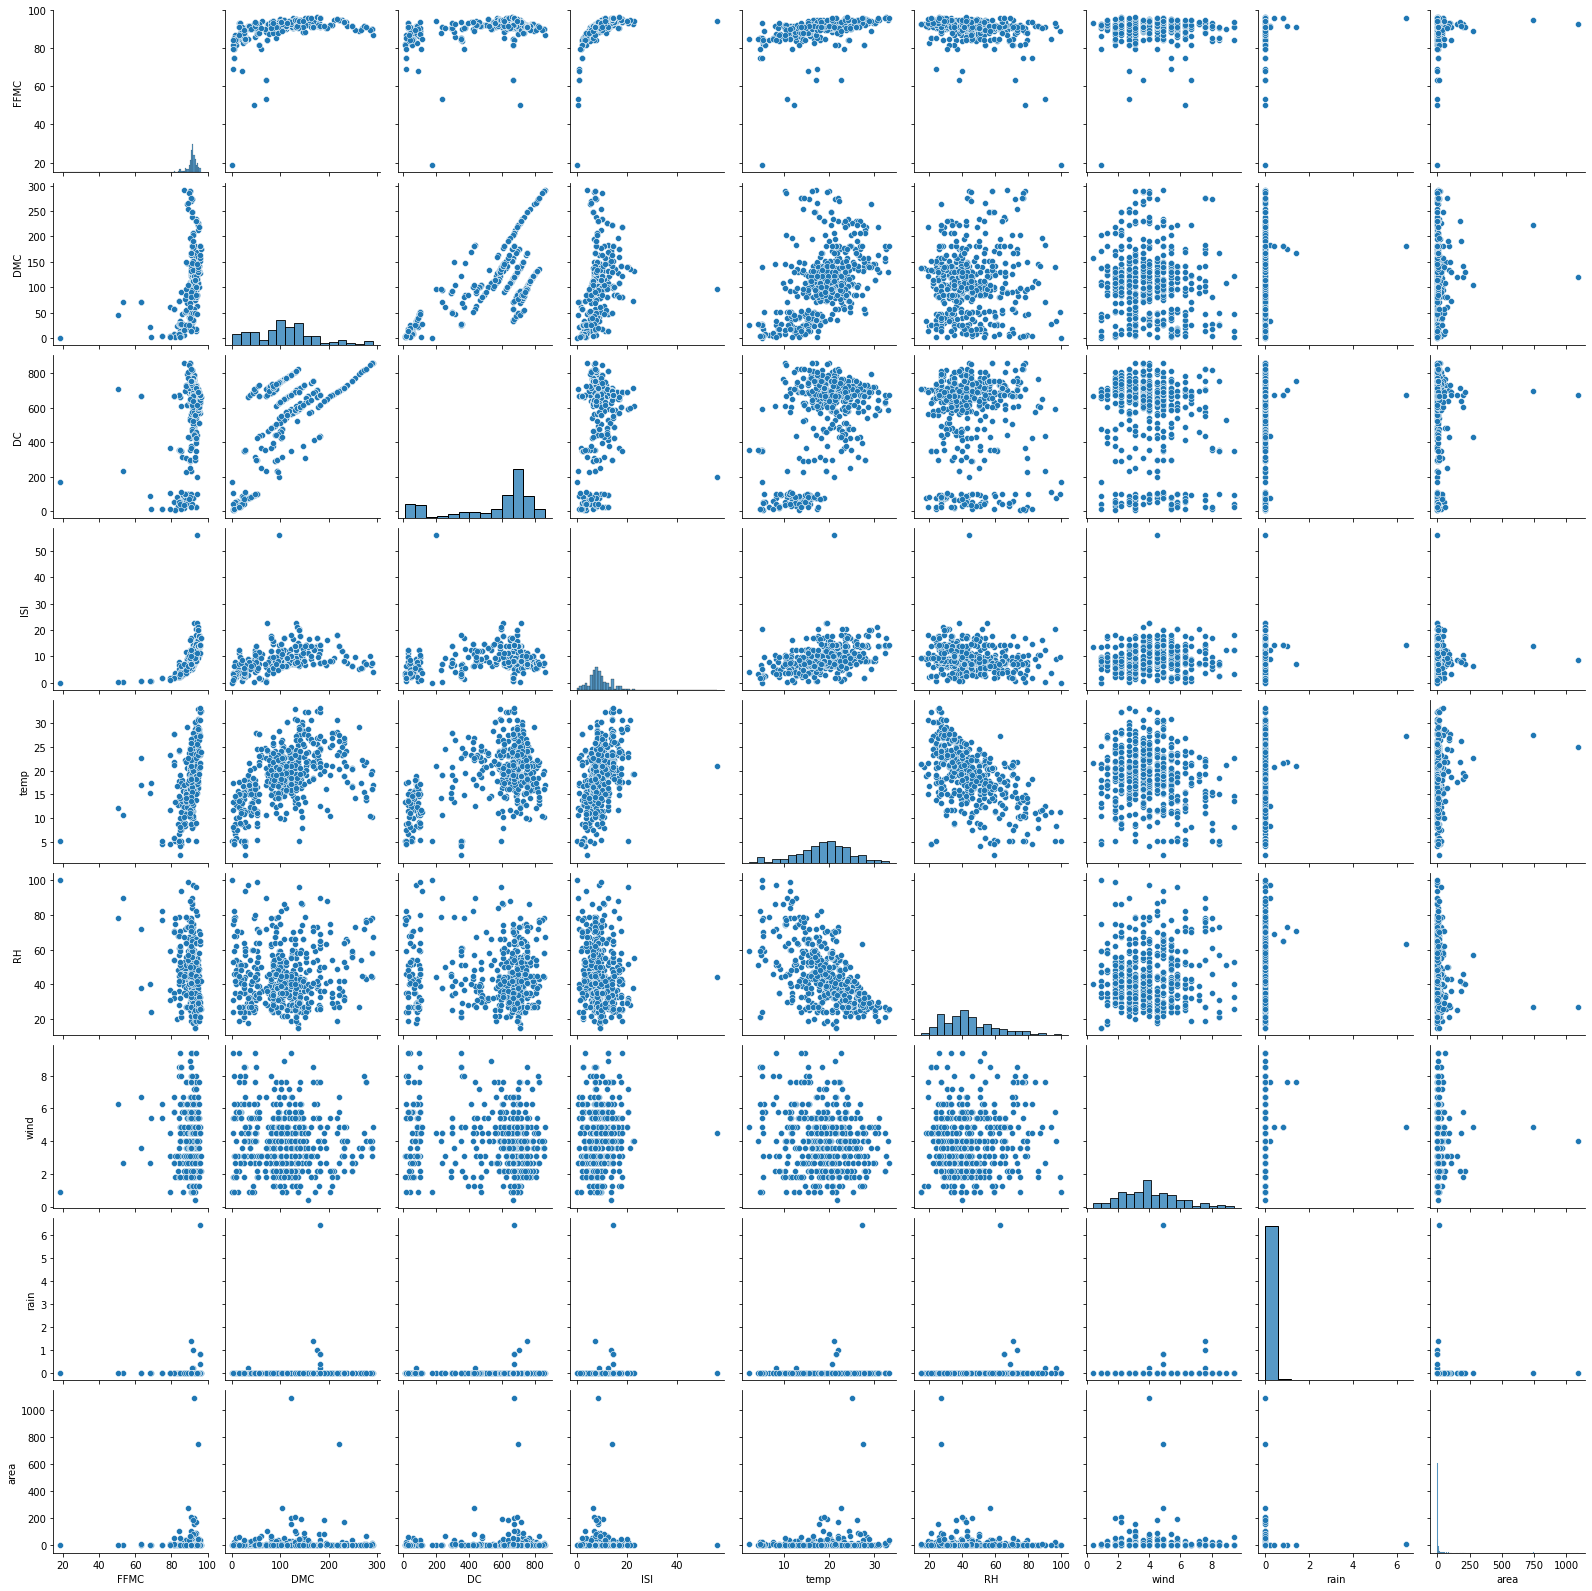

In [ ]:
sns.pairplot(forest_df_1)

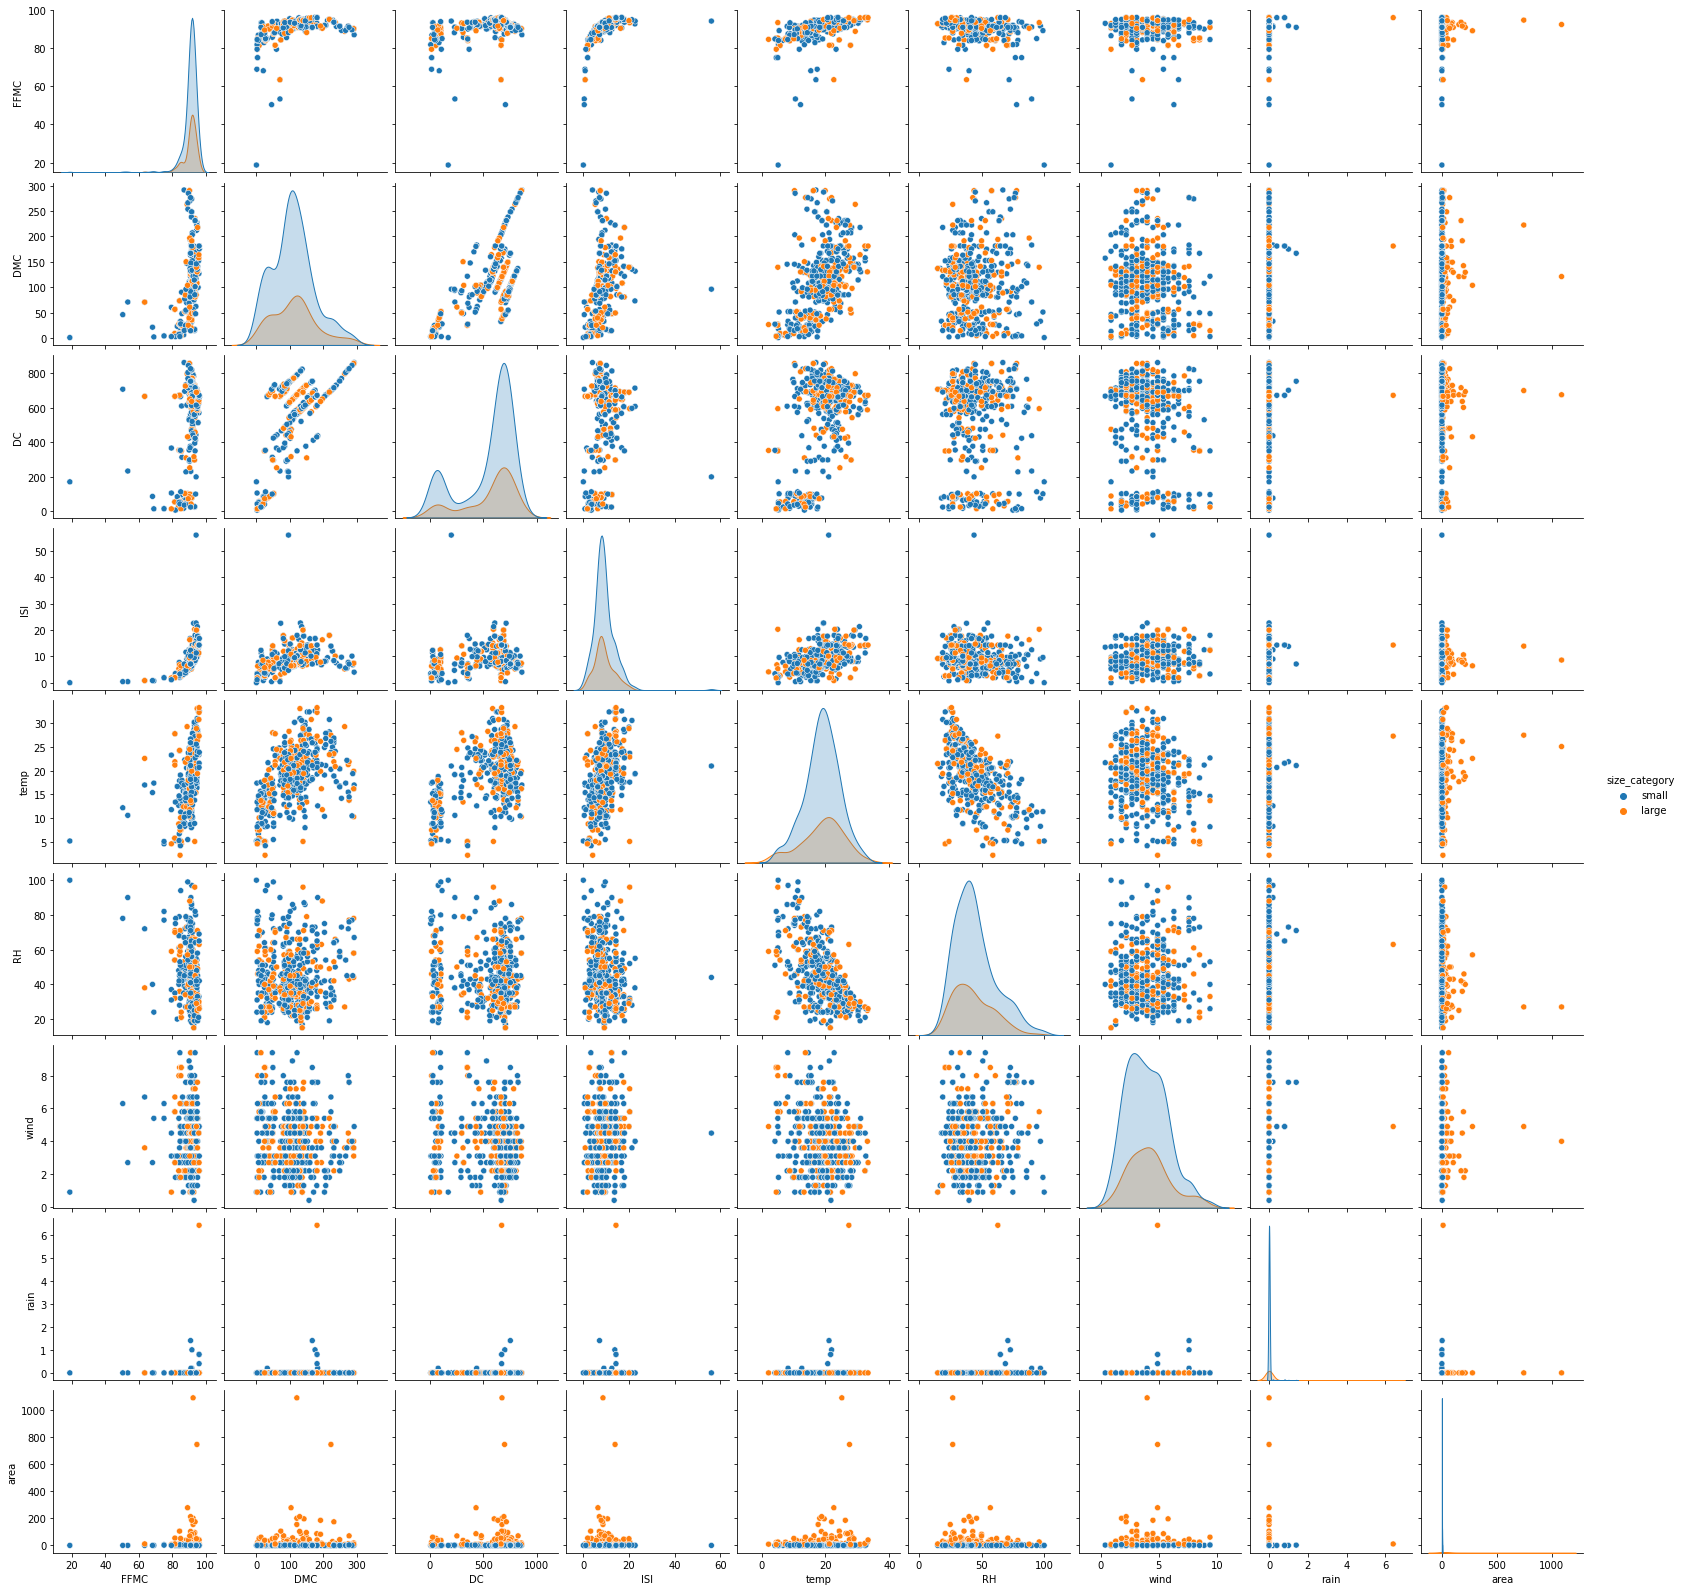

In [ ]:
sns.pairplot(forest_df_1,hue='size_category')

In [ ]:
#feature Engineering
X = forest_data.drop('size_category',axis=1)
y = forest_data['size_category']

In [ ]:
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X, y)

In [ ]:
scores = fit.scores_
features = fit.transform(X)

In [ ]:
imp_feature_df = pd.DataFrame(list(zip(scores,X.columns)),columns=['Scores','Features'])
imp_feature_df.sort_values(by='Scores',ascending=False,inplace=True)
imp_feature_df

,Scores,Features
8,15510.269159,area
2,45.986882,DC
1,40.734806,DMC
18,17.381104,monthdec
7,6.237364,rain
5,4.852902,RH
6,1.454745,wind
23,1.083925,monthmar
13,0.900285,daythu
17,0.786364,monthaug


In [ ]:
#Splitting the data into training and testing sets

In [ ]:
forest_data.head(2)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small


In [ ]:
#Converting the categorues of target feature into labelencoder
le = LabelEncoder()
df_1 = forest_data.copy()
df_1['size_category'] = pd.DataFrame(le.fit_transform(df_1['size_category']))
df_1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
x = df_1.drop('size_category',axis=1)
y = df_1['size_category']

In [ ]:
#normalizing the variables
std = StandardScaler()
x_std = pd.DataFrame(std.fit_transform(x), columns=x.columns)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=0.3,random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((356, 28), (153, 28), (356,), (153,))

In [ ]:
#model Building
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
SVMC = SVC(random_state=42)

svc_param_grid = {'kernel': ['rbf', 'sigmoid', 'poly','linear'], 
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'C': [1000, 100, 10, 1]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = 10, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsSVMC.fit(x_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(random_state=42), n_jobs=6,
             param_grid={'C': [1000, 100, 10, 1],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid', 'poly', 'linear']},
             scoring='accuracy', verbose=1)

In [ ]:
gsSVMC.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [ ]:
#Using those parameters building the model

In [ ]:
model = SVC(kernel='linear',C=10,gamma=1)
model.fit(x_train,y_train)

SVC(C=10, gamma=1, kernel='linear')

In [ ]:
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9607843137254902

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        44
           1       0.96      0.99      0.97       109

    accuracy                           0.96       153
   macro avg       0.97      0.94      0.95       153
weighted avg       0.96      0.96      0.96       153



In [ ]:
#Checking the scores of both training and testing datasets
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.9859550561797753
0.9607843137254902


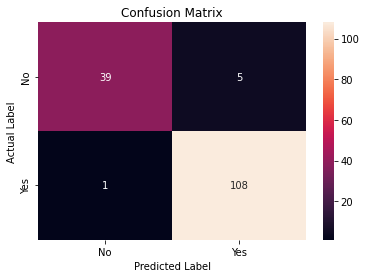

In [ ]:
cm_df=confusion_matrix(y_test, y_pred)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [ ]:
cmp_df = pd.DataFrame(y_test)
cmp_df['pred_category'] = y_pred

In [ ]:
cmp_df

,size_category,pred_category
79,1,1
317,0,1
486,1,1
397,1,1
167,1,1
...,...,...
155,1,1
94,1,1
245,1,1
433,0,0
